{
  "chunk_size": 1000,
  "column_name": "C_ID",
  "results": [
    {
      "quotient_size": 10,
      "remainder_size": 0,
      "runtime": 35865
    },
    {
      "quotient_size": 10,
      "remainder_size": 8,
      "runtime": 20286
    },
    {
      "quotient_size": 10,
      "remainder_size": 16,
      "runtime": 26442
    },
    {
      "quotient_size": 10,
      "remainder_size": 32,
      "runtime": 38876
    }
  ],
  "table_name": "CUSTOMER",
  "warehouse_size": 1
}


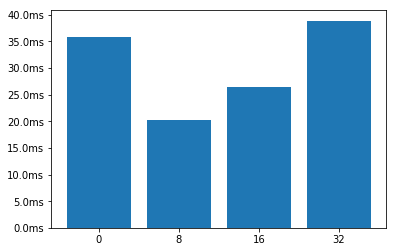

In [29]:
import json
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

results = json.load(open('benchmark_results.json','r'))
print(json.dumps(results, indent=2, sort_keys=False))

remainder_sizes = [o["remainder_size"] for o in results["results"]]
runtimes = [o["runtime"] for o in results["results"]]

x = np.arange(4)
money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


def millions(x, pos):
    'The two args are the value and tick position'
    #return '$%1.1fM' % (x * 1e-6)
    return '%1.1fms' % (x * 1e-3)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, runtimes)
plt.xticks(x, remainder_sizes)
plt.show()